In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install tensorflow

In [2]:
# Step 1: Imports
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt


In [3]:
# Step 2: Define paths and image settings
data_train_path = 'C:\\Users\\mohan\\OneDrive\\Desktop\\Animal Classification\\train'
data_val_path = 'C:\\Users\\mohan\\OneDrive\\Desktop\\Animal Classification\\validation'
data_test_path = 'C:\\Users\\mohan\\OneDrive\\Desktop\\Animal Classification\\testing'

img_width = 180
img_height = 180
img_size = (img_width, img_height)
batch_size = 16
num_classes = 15


In [4]:
# Step 3: Image Data Generators (no split needed)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    data_train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_data = val_test_datagen.flow_from_directory(
    data_val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_data = val_test_datagen.flow_from_directory(
    data_test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 1404 images belonging to 15 classes.
Found 180 images belonging to 15 classes.
Found 360 images belonging to 15 classes.


In [5]:
# Step 4: Build the Model (Transfer Learning)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
base_model.trainable = False  # Freeze base

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\mohan\AppData\Local\Temp\ipykernel_9272\2181910529.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 6, 6, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,423,887 (9.25 MB)

 Trainable params: 165,903 (648.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [6]:
# Step 5: Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True, verbose=1)


In [7]:
# Step 6: Train the Model
epochs = 25

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=2
)


C:\Users\mohan\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25

Epoch 1: val_loss improved from inf to 0.75621, saving model to best_model.keras
88/88 - 94s - 1s/step - accuracy: 0.4729 - loss: 1.7760 - val_accuracy: 0.8000 - val_loss: 0.7562 - learning_rate: 0.0010
Epoch 2/25

Epoch 2: val_loss improved from 0.75621 to 0.57849, saving model to best_model.keras
88/88 - 71s - 808ms/step - accuracy: 0.7329 - loss: 0.8580 - val_accuracy: 0.8333 - val_loss: 0.5785 - learning_rate: 0.0010
Epoch 3/25

Epoch 3: val_loss did not improve from 0.57849
88/88 - 72s - 815ms/step - accuracy: 0.7956 - loss: 0.6579 - val_accuracy: 0.8333 - val_loss: 0.6038 - learning_rate: 0.0010
Epoch 4/25

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 4: val_loss did not improve from 0.57849
88/88 - 71s - 808ms/step - accuracy: 0.7970 - loss: 0.6130 - val_accuracy: 0.8444 - val_loss: 0.6317 - learning_rate: 0.0010
Epoch 5/25

Epoch 5: val_loss did not improve from 0.57849
88/88 - 75s - 853ms/step - accuracy: 0.8533 - loss: 0.4664 

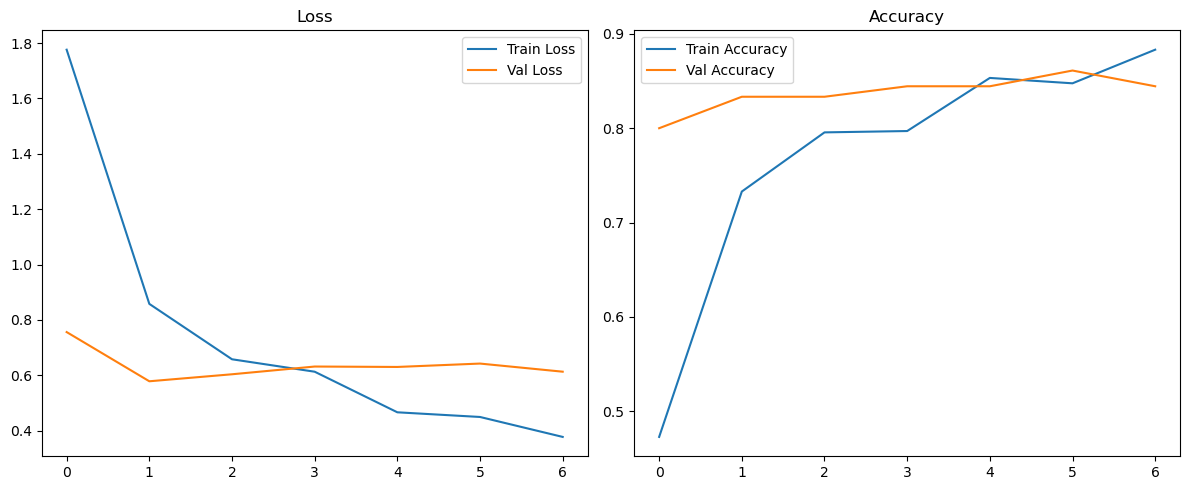

23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 360ms/step - accuracy: 0.8448 - loss: 0.5225

✅ Test Accuracy: 84.17%


In [8]:
# Step 7: Evaluate and Visualize
# Plot Loss & Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_data)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")


In [27]:
import tensorflow as tf

# Step 1: Load image and resize
image_path =  r"C:\Users\mohan\Downloads\dog prdict.jpeg"



 # Corrected path syntax
img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))

# Step 2: Convert image to array
img_array = tf.keras.utils.img_to_array(img)

# Step 3: Rescale (same as during training)
img_array = img_array / 255.0

# Step 4: Expand dimensions to simulate batch of size 1
img_batch = tf.expand_dims(img_array, axis=0)

# Step 5: Predict
pred = model.predict(img_batch)
pred_class_index = tf.argmax(pred[0]).numpy()

# Step 6: Get class label name
class_names = list(train_data.class_indices.keys())
predicted_label = class_names[pred_class_index]

# Step 7: Print result
print(f"🔍 Predicted Class: {predicted_label}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
🔍 Predicted Class: Dog


In [16]:
model.save("C:/Users/mohan/Downloads/animal_classifier.h5")


In [19]:
!pip install gradio


In [25]:
import tensorflow as tf
import numpy as np
from PIL import Image
import gradio as gr

# Load model
model = tf.keras.models.load_model(r"C:\Users\mohan\Downloads\animal_classifier.h5")

# Class names
class_names = ['Cat', 'Dog', 'Horse', 'Elephant', 'Tiger', 'Lion', 'Monkey', 'Zebra',
               'Bear', 'Deer', 'Cow', 'Sheep', 'Rabbit', 'Leopard', 'Giraffe']

# Prediction function
def predict_image(image):
    try:
        if image is None:
            return "No image provided!"

        # Resize image to model's expected size
        image = image.resize((180, 180))  # match model input size
        img_array = np.array(image) / 255.0  # Rescale the image

        # Ensure correct number of channels (RGB)
        if img_array.shape[-1] != 3:
            return "Image must have 3 color channels (RGB)."

        img_array = np.expand_dims(img_array, axis=0)  # (1, 180, 180, 3)

        # Get model predictions (this should give probabilities or logits depending on model)
        preds = model.predict(img_array)[0]
        
        # If predictions are logits, apply softmax to get probabilities
        pred_probs = tf.nn.softmax(preds).numpy()  # Apply softmax and convert to numpy

        # Get top 5 predicted classes
        top_5_preds = np.argsort(pred_probs)[::-1][:5]  # Sort and get top 5
        top_5_classes = {class_names[i]: float(pred_probs[i]) for i in top_5_preds}

        return top_5_classes

    except Exception as e:
        return f"Error: {str(e)}"

# Gradio UI
gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=5),
    title="Animal Classifier",
    description="Upload an animal image to classify it"
).launch(inline=True)  # remove inline=True if not in notebook






* Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Created dataset file at: .gradio\flagged\dataset1.csv
